# CREATE TRAIN AND TEST DATASET

In [1]:
import scipy.io as scio
x,y = scio.loadmat('oil_data.mat')['oil_raw_data'].transpose(),\
      scio.loadmat('oil_label.mat')['data_label'][:,4]

Normalizing

In [2]:
xmin,xmax = x.min(),x.max()
x=(x-xmin)/(xmax-xmin)
ymin,ymax = y.min(axis=0),y.max(axis=0)
y =  (y-ymin)/(ymax-ymin)

Show the spectrum

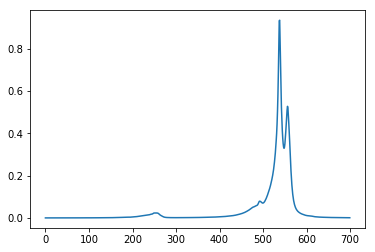

In [3]:
import matplotlib.pyplot as plt
plt.plot(x[2,:])
plt.show()

Create train and test dataset

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,
                                              random_state=0)

# BUILD MODEL

SET PARAMETERS

In [15]:
import numpy as np
tuned_parameters = [{'kernel':['rbf'],'gamma':np.logspace(-2,5,20),
                     'C':np.linspace(1,1000,100)},
                   {'kernel':['linear'],'C':[1,10,100,1000]}]
metric = 'neg_mean_squared_error'

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [17]:
print('# TUNING HYPER-PARAMETERS FOR MESE')
print()
oil = GridSearchCV(SVR(C=1),tuned_parameters,\
                   scoring=metric,cv=5,verbose=0,n_jobs=-1)
oil.fit(x_train,y_train)

# TUNING HYPER-PARAMETERS FOR MESE



GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'gamma': array([  1.00000e-02,   2.33572e-02,   5.45559e-02,   1.27427e-01,
         2.97635e-01,   6.95193e-01,   1.62378e+00,   3.79269e+00,
         8.85867e+00,   2.06914e+01,   4.83293e+01,   1.12884e+02,
         2.63665e+02,   6.15848e+02,   1.43845e+03,   3.35982e+03,
         7.84760e+03,   1.83298e+04,   4.28133e+04,   1.00000e+05]), 'kernel': ['rbf'], 'C': array([    1.     ,    11.09091, ...,   989.90909,  1000.     ])}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [18]:
print('Best parameters set found on development')
print()
print(oil.best_params_)
print()

means = oil.cv_results_['mean_test_score']
stds  = oil.cv_results_['std_test_score']
for mean,std,params in zip(means,stds,oil.cv_results_['params']):
    print('%0.3f(+/-%0.03f) for %r'%(mean,std*2,params))
print()

Best parameters set found on development

{'gamma': 1.623776739188721, 'kernel': 'rbf', 'C': 1000.0}

-0.025(+/-0.003) for {'gamma': 0.01, 'kernel': 'rbf', 'C': 1.0}
-0.024(+/-0.003) for {'gamma': 0.023357214690901226, 'kernel': 'rbf', 'C': 1.0}
-0.024(+/-0.003) for {'gamma': 0.054555947811685199, 'kernel': 'rbf', 'C': 1.0}
-0.023(+/-0.003) for {'gamma': 0.12742749857031335, 'kernel': 'rbf', 'C': 1.0}
-0.023(+/-0.003) for {'gamma': 0.29763514416313175, 'kernel': 'rbf', 'C': 1.0}
-0.021(+/-0.003) for {'gamma': 0.69519279617756058, 'kernel': 'rbf', 'C': 1.0}
-0.020(+/-0.003) for {'gamma': 1.623776739188721, 'kernel': 'rbf', 'C': 1.0}
-0.018(+/-0.002) for {'gamma': 3.7926901907322499, 'kernel': 'rbf', 'C': 1.0}
-0.017(+/-0.002) for {'gamma': 8.8586679041008232, 'kernel': 'rbf', 'C': 1.0}
-0.017(+/-0.002) for {'gamma': 20.69138081114788, 'kernel': 'rbf', 'C': 1.0}
-0.017(+/-0.002) for {'gamma': 48.329302385717519, 'kernel': 'rbf', 'C': 1.0}
-0.018(+/-0.003) for {'gamma': 112.88378916846884

SHOW RESULT

In [19]:
from sklearn.metrics import r2_score
y_train_true,y_train_pred = y_train,oil.predict(x_train)
y_test_true, y_test_pred  = y_test, oil.predict(x_test)
print( r2_score(y_test_true, y_test_pred),
      r2_score(y_train_true,y_train_pred))

0.412047798135 0.773179445343


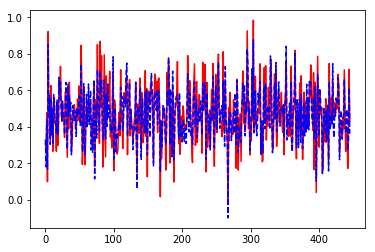

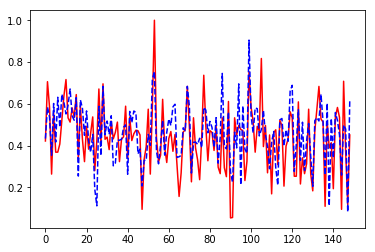

In [20]:
train_numb,test_numb = len(y_train_true),len(y_test_pred)
plt.plot(np.arange(train_numb),y_train_true,'r-',
        np.arange(train_numb), y_train_pred,'b--')
plt.show()
plt.plot(np.arange(test_numb),y_test_true,'r-',
        np.arange(test_numb), y_test_pred,'b--')
plt.show()